## Dependencies

In [4]:
import pandas as pd
import numpy as np
import scipy as sp
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display, clear_output

In [5]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

## Data Set

In [6]:
raw_dataset_path = '../dataset/raw/'
processed_dataset_path = '../dataset/processed/'
raw_dataset_file = 'Capstone_Dataset_v1.0.csv'
processed_dataset_file = 'Processed_Capstone_Dataset_v1.0.csv'

In [12]:
raw_dataset_full_path = os.path.join(raw_dataset_path, raw_dataset_file)
df = pd.read_csv(raw_dataset_full_path)
print(f"Raw dataset '{raw_dataset_file}' loaded successfully from {raw_dataset_path}")
df.info()

Raw dataset 'Capstone_Dataset_v1.0.csv' loaded successfully from ../dataset/raw/
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71357 entries, 0 to 71356
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          71357 non-null  object 
 1   DEPARTMENT  71357 non-null  object 
 2   CATEGORY    71357 non-null  object 
 3   SKU         71357 non-null  object 
 4   Store       71357 non-null  object 
 5   Week        71357 non-null  object 
 6   Units_Sold  71357 non-null  int64  
 7   Net_Price   71357 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 4.4+ MB


## Cleansing and Wrangling

In [13]:
df['Week'] = pd.to_datetime(df['Week'], format='%m/%d/%Y')
df.head()

,ID,DEPARTMENT,CATEGORY,SKU,Store,Week,Units_Sold,Net_Price
0,Store_6_SKU238,Dept13,Category34,SKU238,Store_6,2021-03-31,625,2.04
1,Store_18_SKU329,Dept18,Category42,SKU329,Store_18,2021-03-31,209,26.73
2,Store_3_SKU76,Dept5,Category24,SKU76,Store_3,2021-03-31,2146,21.72
3,Store_16_SKU18,Dept17,Category70,SKU18,Store_16,2021-03-31,317,2.64
4,Store_5_SKU719,Dept43,Category12,SKU719,Store_5,2021-03-31,97,23.82


In [14]:
missing_values = df.isnull().sum()
print("Missing values in the dataset before cleaning:")
print(missing_values)

Missing values in the dataset before cleaning:
ID            0
DEPARTMENT    0
CATEGORY      0
SKU           0
Store         0
Week          0
Units_Sold    0
Net_Price     0
dtype: int64


In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df = df.sort_values(by=['Store','DEPARTMENT','CATEGORY','SKU','Week'])
df.reset_index(drop=True, inplace=True)
df.head()

,ID,DEPARTMENT,CATEGORY,SKU,Store,Week,Units_Sold,Net_Price
0,Store_1_SKU239,Dept13,Category34,SKU239,Store_1,2021-03-31,240,3.81
1,Store_1_SKU239,Dept13,Category34,SKU239,Store_1,2021-04-07,132,5.49
2,Store_1_SKU239,Dept13,Category34,SKU239,Store_1,2021-04-14,324,3.63
3,Store_1_SKU239,Dept13,Category34,SKU239,Store_1,2021-04-21,335,3.72
4,Store_1_SKU239,Dept13,Category34,SKU239,Store_1,2021-04-28,146,3.48


In [17]:
# Feature 1: Total Revenue (Units_Sold * Net_Price)
df['Total_Revenue'] = df['Units_Sold'] * df['Net_Price']
df['Net_Price'] = df['Net_Price'].round(2)
df['Total_Revenue'] = df['Total_Revenue'].round(2)

In [18]:
# Feature 2: Extract time-based features from 'Week'
df['Year'] = df['Week'].dt.year
df['Month'] = df['Week'].dt.month
df['Week_Number'] = df['Week'].dt.isocalendar().week

In [19]:
new_column_order = ['ID', 'Store', 'DEPARTMENT', 'CATEGORY', 'SKU', 'Units_Sold', 'Net_Price', 'Total_Revenue', 'Week', 'Year', 'Month', 'Week_Number']
df = df[new_column_order]
print(df.head())

               ID    Store DEPARTMENT    CATEGORY     SKU  Units_Sold  \
0  Store_1_SKU239  Store_1     Dept13  Category34  SKU239         240   
1  Store_1_SKU239  Store_1     Dept13  Category34  SKU239         132   
2  Store_1_SKU239  Store_1     Dept13  Category34  SKU239         324   
3  Store_1_SKU239  Store_1     Dept13  Category34  SKU239         335   
4  Store_1_SKU239  Store_1     Dept13  Category34  SKU239         146   

   Net_Price  Total_Revenue       Week  Year  Month  Week_Number  
0       3.81         914.40 2021-03-31  2021      3           13  
1       5.49         724.68 2021-04-07  2021      4           14  
2       3.63        1176.12 2021-04-14  2021      4           15  
3       3.72        1246.20 2021-04-21  2021      4           16  
4       3.48         508.08 2021-04-28  2021      4           17  


In [20]:
df_cleaned_head = df.head()
df_cleaned_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71357 entries, 0 to 71356
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             71357 non-null  object        
 1   Store          71357 non-null  object        
 2   DEPARTMENT     71357 non-null  object        
 3   CATEGORY       71357 non-null  object        
 4   SKU            71357 non-null  object        
 5   Units_Sold     71357 non-null  int64         
 6   Net_Price      71357 non-null  float64       
 7   Total_Revenue  71357 non-null  float64       
 8   Week           71357 non-null  datetime64[ns]
 9   Year           71357 non-null  int32         
 10  Month          71357 non-null  int32         
 11  Week_Number    71357 non-null  UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(2), int32(2), int64(1), object(5)
memory usage: 5.8+ MB


In [21]:
df_cleaned_head

,ID,Store,DEPARTMENT,CATEGORY,SKU,Units_Sold,Net_Price,Total_Revenue,Week,Year,Month,Week_Number
0,Store_1_SKU239,Store_1,Dept13,Category34,SKU239,240,3.81,914.40,2021-03-31,2021,3,13
1,Store_1_SKU239,Store_1,Dept13,Category34,SKU239,132,5.49,724.68,2021-04-07,2021,4,14
2,Store_1_SKU239,Store_1,Dept13,Category34,SKU239,324,3.63,1176.12,2021-04-14,2021,4,15
3,Store_1_SKU239,Store_1,Dept13,Category34,SKU239,335,3.72,1246.20,2021-04-21,2021,4,16
4,Store_1_SKU239,Store_1,Dept13,Category34,SKU239,146,3.48,508.08,2021-04-28,2021,4,17


In [23]:
processed_dataset_full_path = os.path.join(processed_dataset_path, processed_dataset_file)
df.to_csv(processed_dataset_full_path, index=False)
print(f"Processed dataset saved successfully as '{processed_dataset_file}' in {processed_dataset_path}.")

Processed dataset saved successfully as 'Processed_Capstone_Dataset_v1.0.csv' in ../dataset/processed/.


## EDA

### Distribution

In [24]:
processed_dataset_full_path = os.path.join(processed_dataset_path, processed_dataset_file)
df = pd.read_csv(processed_dataset_full_path)

In [27]:
unique_stores = df['Store'].nunique()
print(f"Unique Stores: {unique_stores}")

unique_departments = df['DEPARTMENT'].nunique()
print(f"Unique DEPARTMENTs: {unique_departments}")

unique_categories = df['CATEGORY'].nunique()
print(f"Unique CATEGORYs: {unique_categories}")

unique_skus = df['SKU'].nunique()
print(f"Unique SKUs: {unique_skus}")

unique_ID = df['ID'].nunique()
print(f"Unique ID: {unique_ID}")

unique_Week = df['Week'].nunique()
print(f"Number of Weeks: {unique_Week} ranging from {df['Week'].min()} to {df['Week'].max()}")

Unique Stores: 21
Unique DEPARTMENTs: 44
Unique CATEGORYs: 43
Unique SKUs: 401
Unique ID: 499
Number of Weeks: 143 ranging from 2021-03-31 to 2023-12-20


In [28]:
# Columns to choose from for the sunburst path
available_columns = ['Store', 'DEPARTMENT', 'CATEGORY', 'SKU']

# Create checkboxes for the user to select which columns to include in the sunburst
column_select = widgets.SelectMultiple(
    options=available_columns,
    value=available_columns,  # Default value (all columns selected)
    description='Columns',
    disabled=False
)

# Function to update the sunburst chart based on user selection
def update_sunburst(selected_columns):
    # Clear previous output
    clear_output(wait=True)

    # Ensure at least one column is selected
    if len(selected_columns) == 0:
        print("Please select at least one column for the hierarchy.")
        return

    # Generate the sunburst chart with the selected columns
    fig = px.sunburst(
        df,
        path=selected_columns,  # Use selected columns for the sunburst path
        values='Units_Sold',
        title="Hierarchy of Selected Columns (This visualization is interactive, press CMD key to select multiple features.)",
        height=700
    )
    fig.show()

    # Re-display the widget after clearing
    display(column_select)

# Link the function to the widget
column_select.observe(lambda change: update_sunburst(change['new']), names='value')

# Initial display
display(column_select)
update_sunburst(column_select.value)


SelectMultiple(description='Columns', index=(0, 1, 2), options=('Store', 'DEPARTMENT', 'CATEGORY', 'SKU'), val…

In [29]:
unique_values_df = df[['Store', 'DEPARTMENT', 'CATEGORY', 'SKU']].drop_duplicates()
output_file = 'unique_store_department_category_sku.csv'
output_path = os.path.join(processed_dataset_path, output_file)
unique_values_df.to_csv(output_path, index=False)
print(f"'Store', 'DEPARTMENT', 'CATEGORY', and 'SKU' saved successfully to '{output_file}'.")

'Store', 'DEPARTMENT', 'CATEGORY', and 'SKU' saved successfully to 'unique_store_department_category_sku.csv'.


### Imbalance

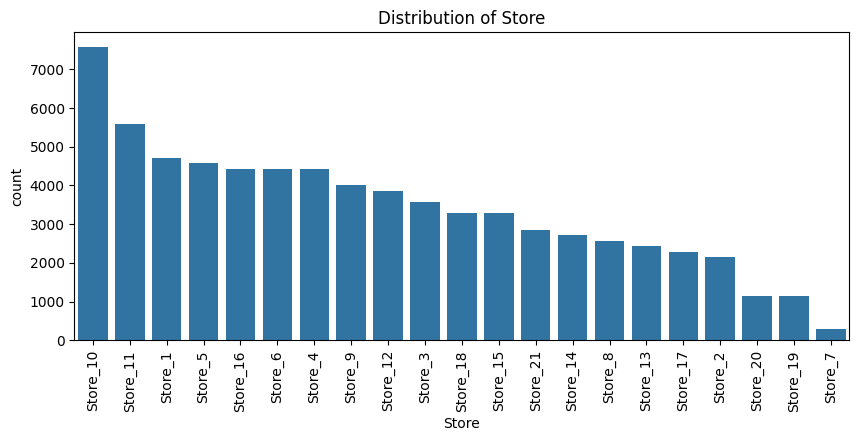

In [31]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Store', order=df['Store'].value_counts().index)
plt.title('Distribution of Store')
plt.xticks(rotation=90)
plt.show()

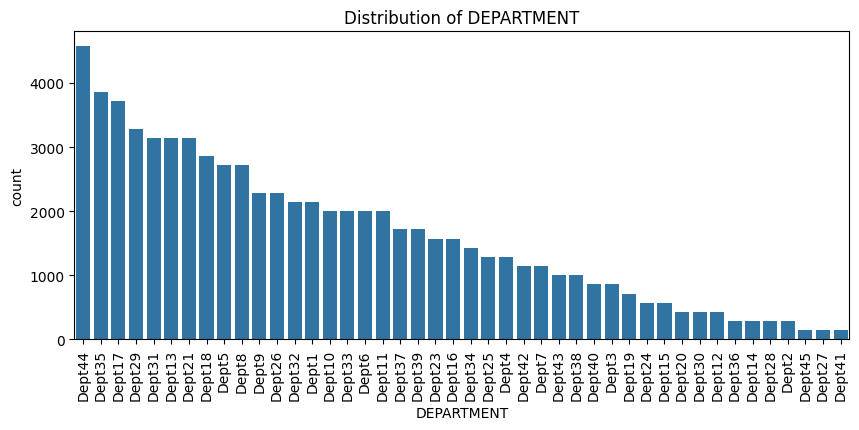

In [83]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='DEPARTMENT', order=df['DEPARTMENT'].value_counts().index)
plt.title('Distribution of DEPARTMENT')
plt.xticks(rotation=90)
plt.show()

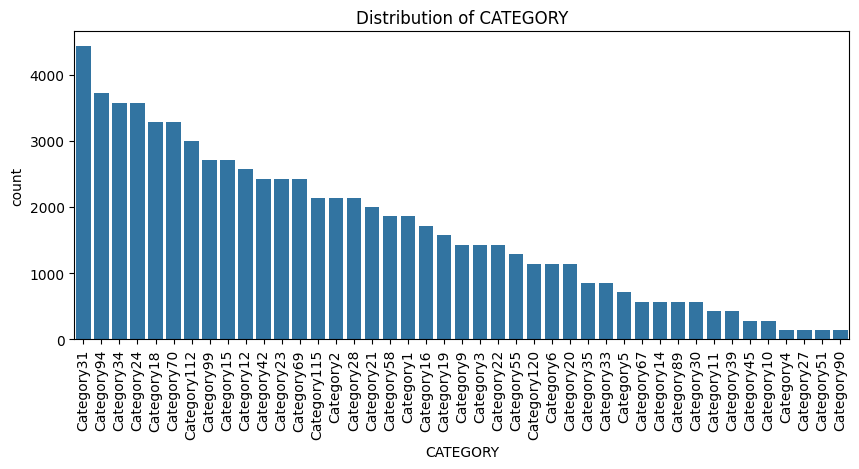

In [84]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='CATEGORY', order=df['CATEGORY'].value_counts().index)
plt.title('Distribution of CATEGORY')
plt.xticks(rotation=90)
plt.show()

## Lag Features

### Upto 104 weeks

In [39]:
processed_dataset_full_path = os.path.join(processed_dataset_path, processed_dataset_file)
df = pd.read_csv(processed_dataset_full_path)

In [51]:
lag_intervals = [1, 2, 4, 8, 12, 16, 20, 24, 36, 52, 65, 78, 91, 104]

def create_lag_features(group, lag_intervals):
    for lag in lag_intervals:
        group[f'lag_{lag}'] = group['Units_Sold'].shift(lag)
        group[f'lag_{lag}'] = group[f'lag_{lag}'].apply(lambda x: int(x) if pd.notna(x) else x)
    return group

df_lagged = df.groupby('ID').apply(create_lag_features, lag_intervals=lag_intervals)
df_lagged = df_lagged.dropna()
df_lagged.head()

ID     Store DEPARTMENT    CATEGORY   SKU  \
ID                                                                          
Store_10_SKU1 11401  Store_10_SKU1  Store_10      Dept4  Category15  SKU1   
              11402  Store_10_SKU1  Store_10      Dept4  Category15  SKU1   
              11403  Store_10_SKU1  Store_10      Dept4  Category15  SKU1   
              11404  Store_10_SKU1  Store_10      Dept4  Category15  SKU1   
              11405  Store_10_SKU1  Store_10      Dept4  Category15  SKU1   

                     Units_Sold  Net_Price  Total_Revenue        Week  Year  \
ID                                                                            
Store_10_SKU1 11401         699      24.69       17258.31  2023-03-29  2023   
              11402         903      18.93       17093.79  2023-04-05  2023   
              11403        1099      20.49       22518.51  2023-04-12  2023   
              11404         753      18.03       13576.59  2023-04-19  2023   
              11405         580      22.17       12858.60  2023-04-26  2023   

                     ...  lag_12  lag_16  lag_20  lag_24  lag_36  lag_52  \
ID                   ...                                                   
Store_10_SKU1 11401  ...  1176.0   767.0   790.0   575.0   792.0   804.0   
              11402  ...   570.0   852.0   676.0   732.0  1154.0   762.0   
              11403  ...   849.0   578.0   774.0   864.0   867.0   671.0   
              11404  ...   729.0   910.0  1145.0   524.0  1014.0   825.0   
              11405  ...   525.0  1176.0   767.0   790.0  1136.0   762.0   

                     lag_65  lag_78  lag_91  lag_104  
ID                                                    
Store_10_SKU1 11401   615.0   590.0  1135.0    933.0  
              11402   999.0  1027.0   913.0    960.0  
              11403  1015.0   835.0   628.0    785.0  
              11404   879.0   735.0   641.0    925.0  
              11405  1418.0   848.0  1320.0    997.0  

[5 rows x 26 columns]

In [52]:
output_file = 'Lag_Features_Dataset_104weeks.csv'
output_path = os.path.join(processed_dataset_path, output_file)
df_lagged.to_csv(output_path, index=False)
print(f"Lag Features of 104 weeks (2 years) saved successfully to '{output_file}'.")

Lag Features of 104 weeks (2 years) saved successfully to 'Lag_Features_Dataset_104weeks.csv'.


Units_Sold    1.000000
lag_1         0.894375
lag_2         0.892276
lag_4         0.881770
lag_8         0.855309
lag_12        0.839185
lag_16        0.827868
lag_20        0.819321
lag_24        0.810096
lag_36        0.812324
lag_52        0.827206
lag_65        0.815193
lag_78        0.801383
lag_91        0.789191
lag_104       0.790681
Name: Units_Sold, dtype: float64


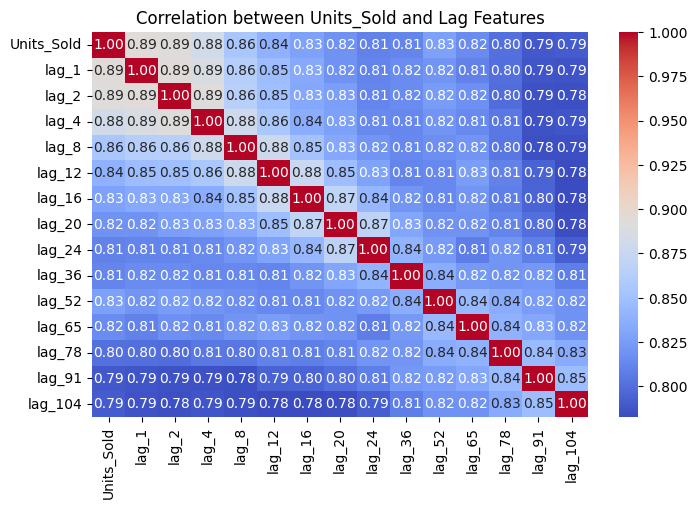

In [56]:
df_corr = df_lagged.dropna()
correlation_matrix = df_corr[['Units_Sold'] + [f'lag_{lag}' for lag in lag_intervals]].corr()
print(correlation_matrix['Units_Sold'])
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Units_Sold and Lag Features')
plt.show()

### Upto 52 weeks

In [57]:
lag_intervals = [1, 2, 4, 8, 12, 16, 20, 24, 36, 52]

def create_lag_features(group, lag_intervals):
    for lag in lag_intervals:
        group[f'lag_{lag}'] = group['Units_Sold'].shift(lag)
        group[f'lag_{lag}'] = group[f'lag_{lag}'].apply(lambda x: int(x) if pd.notna(x) else x)
    return group

df_lagged = df.groupby('ID').apply(create_lag_features, lag_intervals=lag_intervals)
df_lagged = df_lagged.dropna()
df_lagged.head()

ID     Store DEPARTMENT    CATEGORY   SKU  \
ID                                                                          
Store_10_SKU1 11349  Store_10_SKU1  Store_10      Dept4  Category15  SKU1   
              11350  Store_10_SKU1  Store_10      Dept4  Category15  SKU1   
              11351  Store_10_SKU1  Store_10      Dept4  Category15  SKU1   
              11352  Store_10_SKU1  Store_10      Dept4  Category15  SKU1   
              11353  Store_10_SKU1  Store_10      Dept4  Category15  SKU1   

                     Units_Sold  Net_Price  Total_Revenue        Week  Year  \
ID                                                                            
Store_10_SKU1 11349         804      17.22       13844.88  2022-03-30  2022   
              11350         762      16.20       12344.40  2022-04-06  2022   
              11351         671      24.39       16365.69  2022-04-13  2022   
              11352         825      22.62       18661.50  2022-04-20  2022   
              11353         762      18.33       13967.46  2022-04-27  2022   

                     ...  lag_1  lag_2   lag_4   lag_8  lag_12  lag_16  \
ID                   ...                                                 
Store_10_SKU1 11349  ...  492.0  771.0  1068.0  1150.0   999.0  1047.0   
              11350  ...  804.0  492.0   547.0   901.0  1015.0  1126.0   
              11351  ...  762.0  804.0   771.0   793.0   879.0  1386.0   
              11352  ...  671.0  762.0   492.0   629.0  1418.0   615.0   
              11353  ...  825.0  671.0   804.0  1068.0  1150.0   999.0   

                     lag_20  lag_24  lag_36  lag_52  
ID                                                   
Store_10_SKU1 11349  1203.0   835.0   641.0   933.0  
              11350   689.0   735.0  1320.0   960.0  
              11351   751.0   848.0  1683.0   785.0  
              11352  1054.0   755.0  1167.0   925.0  
              11353  1047.0  1203.0  1175.0   997.0  

[5 rows x 22 columns]

In [58]:
output_file = 'Lag_Features_Dataset_52weeks.csv'
output_path = os.path.join(processed_dataset_path, output_file)
df_lagged.to_csv(output_path, index=False)
print(f"Lag Features of 52 weeks (1 year) saved successfully to '{output_file}'.")

Lag Features of 52 weeks (1 year) saved successfully to 'Lag_Features_Dataset_52weeks.csv'.


Units_Sold    1.000000
lag_1         0.893455
lag_2         0.889040
lag_4         0.879562
lag_8         0.858781
lag_12        0.842118
lag_16        0.832787
lag_20        0.826179
lag_24        0.820625
lag_36        0.814806
lag_52        0.823790
Name: Units_Sold, dtype: float64


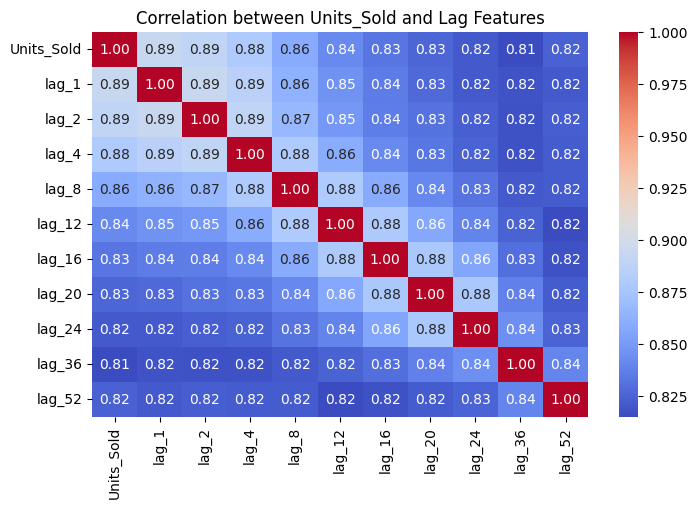

In [59]:
df_corr = df_lagged.dropna()
correlation_matrix = df_corr[['Units_Sold'] + [f'lag_{lag}' for lag in lag_intervals]].corr()
print(correlation_matrix['Units_Sold'])
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Units_Sold and Lag Features')
plt.show()

### Category / Units Sold Variance

In [88]:
category_variances = df.groupby('CATEGORY').agg({'Units_Sold': 'var'}).reset_index()
category_variances = category_variances.rename(columns={'Units_Sold': 'Variance'}).sort_values(by='Variance', ascending=False)

top_10_percent_cutoff = int(0.1 * len(category_variances))
top_25_percent_cutoff = int(0.25 * len(category_variances))

top_10_percent_categories = category_variances.head(top_10_percent_cutoff)
top_25_percent_categories = category_variances.head(top_25_percent_cutoff)

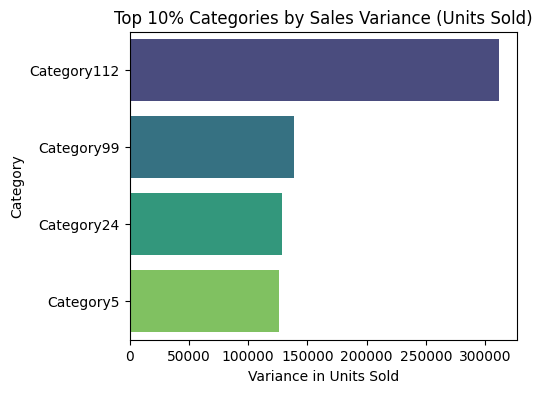

Top 10% Categories by Variance:
       CATEGORY       Variance
3   Category112  311449.862744
42   Category99  138702.069524
17   Category24  128849.439729
30    Category5  125741.469589


In [90]:
plt.figure(figsize=(5, 4))
sns.barplot(x='Variance', y='CATEGORY', data=top_10_percent_categories, palette='viridis')
plt.title('Top 10% Categories by Sales Variance (Units Sold)')
plt.xlabel('Variance in Units Sold')
plt.ylabel('Category')
plt.show()

print("Top 10% Categories by Variance:")
print(top_10_percent_categories)

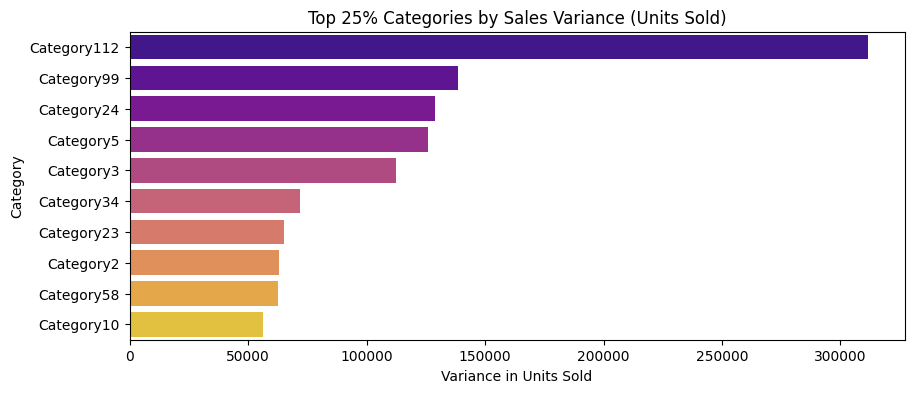


Top 25% Categories by Variance:
       CATEGORY       Variance
3   Category112  311449.862744
42   Category99  138702.069524
17   Category24  128849.439729
30    Category5  125741.469589
20    Category3  112356.187219
24   Category34   72107.970689
16   Category23   65163.492746
12    Category2   63045.053527
33   Category58   62510.905241
1    Category10   56194.167341


In [91]:
plt.figure(figsize=(10, 4))
sns.barplot(x='Variance', y='CATEGORY', data=top_25_percent_categories, palette='plasma')
plt.title('Top 25% Categories by Sales Variance (Units Sold)')
plt.xlabel('Variance in Units Sold')
plt.ylabel('Category')
plt.show()

print("\nTop 25% Categories by Variance:")
print(top_25_percent_categories)

In [92]:
output_file = 'category_variances.csv'
output_path = os.path.join(processed_dataset_path, output_file)
category_variances.to_csv(output_path, index=False)
print(f"Category variances saved successfully to '{output_file}'.")

Category variances saved successfully to 'category_variances.csv'.


### SKU / Units Sold Variance

In [93]:
sku_variances = df.groupby('SKU').agg({'Units_Sold': 'var'}).reset_index()
sku_variances = sku_variances.rename(columns={'Units_Sold': 'Variance'}).sort_values(by='Variance', ascending=False)

top_10_percent_sku_cutoff = int(0.1 * len(sku_variances))
top_25_percent_sku_cutoff = int(0.25 * len(sku_variances))

top_10_percent_skus = sku_variances.head(top_10_percent_sku_cutoff)
top_25_percent_skus = sku_variances.head(top_25_percent_sku_cutoff)


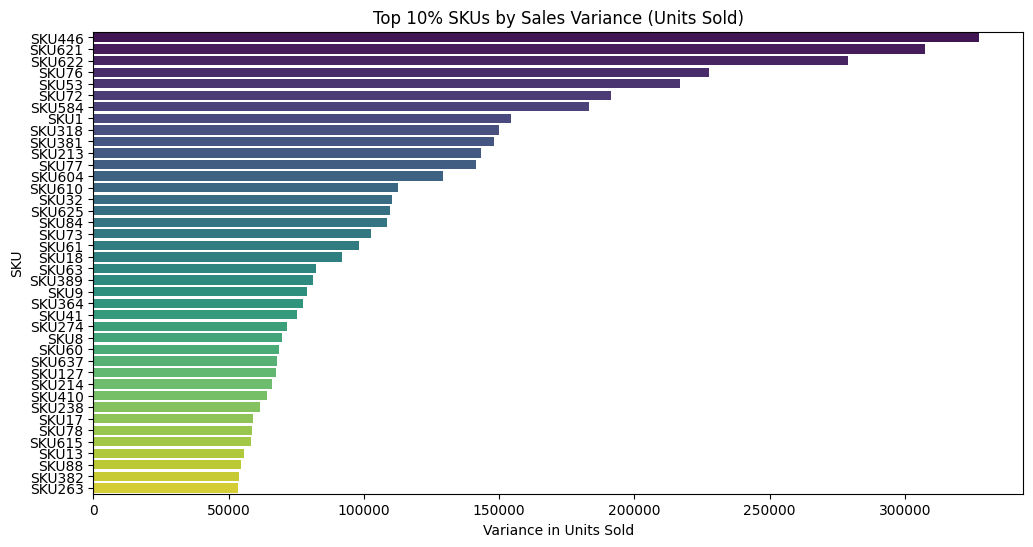

In [94]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Variance', y='SKU', data=top_10_percent_skus, palette='viridis')
plt.title('Top 10% SKUs by Sales Variance (Units Sold)')
plt.xlabel('Variance in Units Sold')
plt.ylabel('SKU')
plt.show()

In [95]:
output_file = 'sku_variances.csv'
output_path = os.path.join(processed_dataset_path, output_file)
sku_variances.to_csv(output_path, index=False)
print(f"SKU variances saved successfully to '{output_file}'.")

SKU variances saved successfully to 'sku_variances.csv'.


### Departments / Units Sold Variance

In [96]:
department_variances = df.groupby('DEPARTMENT').agg({'Units_Sold': 'var'}).reset_index()
department_variances = department_variances.rename(columns={'Units_Sold': 'Variance'}).sort_values(by='Variance', ascending=False)

top_10_percent_department_cutoff = int(0.1 * len(department_variances))
top_25_percent_department_cutoff = int(0.25 * len(department_variances))

top_10_percent_departments = department_variances.head(top_10_percent_department_cutoff)
top_25_percent_departments = department_variances.head(top_25_percent_department_cutoff)


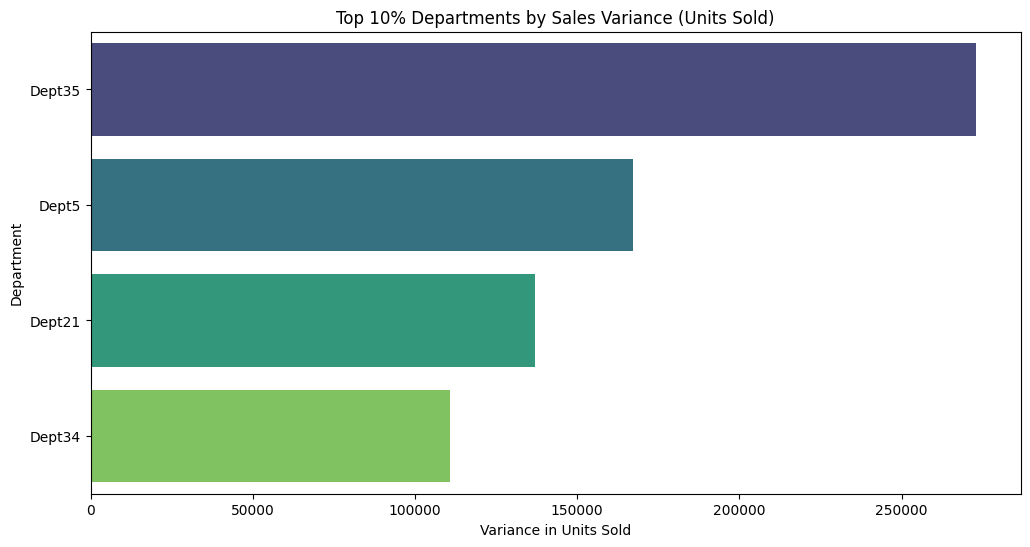

In [97]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Variance', y='DEPARTMENT', data=top_10_percent_departments, palette='viridis')
plt.title('Top 10% Departments by Sales Variance (Units Sold)')
plt.xlabel('Variance in Units Sold')
plt.ylabel('Department')
plt.show()

In [98]:
output_file = 'department_variances.csv'
output_path = os.path.join(processed_dataset_path, output_file)
department_variances.to_csv(output_path, index=False)
print(f"Department variances saved successfully to '{output_file}'.")


Department variances saved successfully to 'department_variances.csv'.


### ID / Units Sold Variance

In [101]:
id_variances = df.groupby('ID').agg({'Units_Sold': 'var'}).reset_index()
id_variances = id_variances.rename(columns={'Units_Sold': 'Variance'}).sort_values(by='Variance', ascending=False)

top_10_percent_id_cutoff = int(0.1 * len(id_variances))
top_25_percent_id_cutoff = int(0.25 * len(id_variances))

top_10_percent_ids = id_variances.head(top_10_percent_id_cutoff)
top_25_percent_ids = id_variances.head(top_25_percent_id_cutoff)

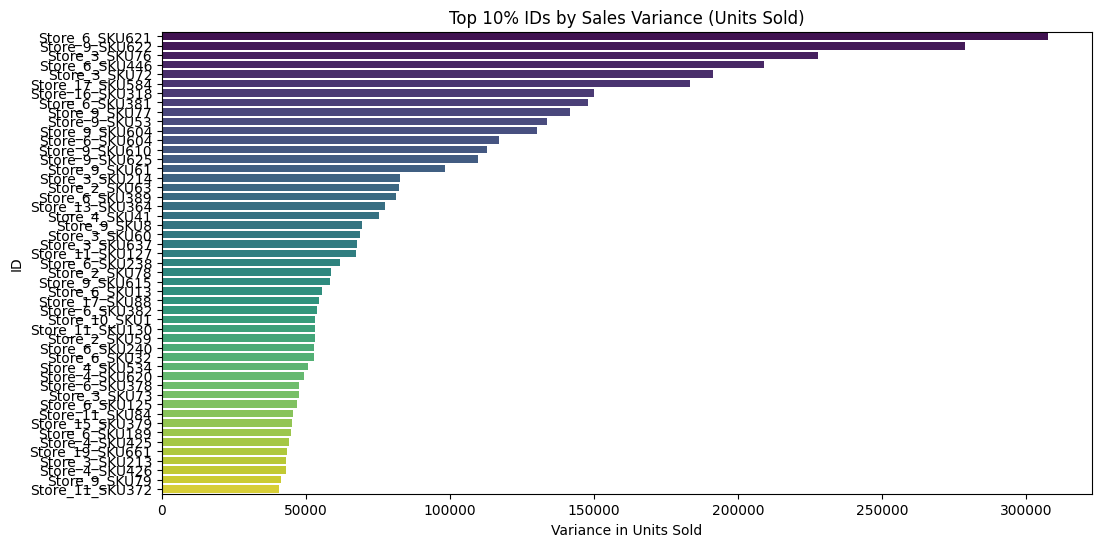

In [102]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Variance', y='ID', data=top_10_percent_ids, palette='viridis')
plt.title('Top 10% IDs by Sales Variance (Units Sold)')
plt.xlabel('Variance in Units Sold')
plt.ylabel('ID')
plt.show()

In [103]:
output_file = 'id_variances.csv'
output_path = os.path.join(processed_dataset_path, output_file)
id_variances.to_csv(output_path, index=False)
print(f"ID variances saved successfully to '{output_file}'.")

ID variances saved successfully to 'id_variances.csv'.
